# Odds Balancing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import statistics

In [13]:
# Parameters
n_events = 5000
probs = [0.8, 0.2]
bets = [50, 50]
odds_fair = [1.25, 5]
odds_misspricing = [1.31, 5.25]
odds_overrounding = [1.19, 4.75]

In [ ]:
# Main functions

# Profit Calculation Function
def calculate_profit(odds, bets, n_events=n_events, probs=probs):
    outcomes = np.random.choice([0, 1], size=n_events, p=probs)
    profit = []
    for i in range(1, len(outcomes)):
        if outcomes[i] == 0:
            event_profit = -((odds[0]-1) * bets[0]) + bets[1]
        elif outcomes[i] == 1:
            event_profit = -((odds[1]-1) * bets[1]) + bets[0]
        profit.append(event_profit)
    cum_profit = np.cumsum(profit).tolist()
    return cum_profit

# Monte Carlo simulation
def monte_carlo_simulation(odds, bets, n_simulations=1000):
    return np.array([calculate_profit(odds, bets) for _ in range(n_simulations)])

# Average the Monte Carlo results
def average_monte_carlo(odds, bets, n_simulations=1000):
    results = monte_carlo_simulation(odds, bets, n_simulations)
    return results.mean(axis=0)

# Run Monte Carlo and store results in DataFrames (one DataFrame per strategy)
def mc_to_df(odds, bets, n_simulations=1000):
    results = monte_carlo_simulation(odds, bets, n_simulations)
    df = pd.DataFrame(results.T,
                      index=range(1, results.shape[1] + 1),
                      columns=[f"sim_{i+1}" for i in range(results.shape[0])])
    return df

In [17]:
# Create DataFrames (available for later analysis)
df_fair = mc_to_df(odds_fair, bets)
df_misspricing = mc_to_df(odds_misspricing, bets)
df_overrounding = mc_to_df(odds_overrounding, bets)

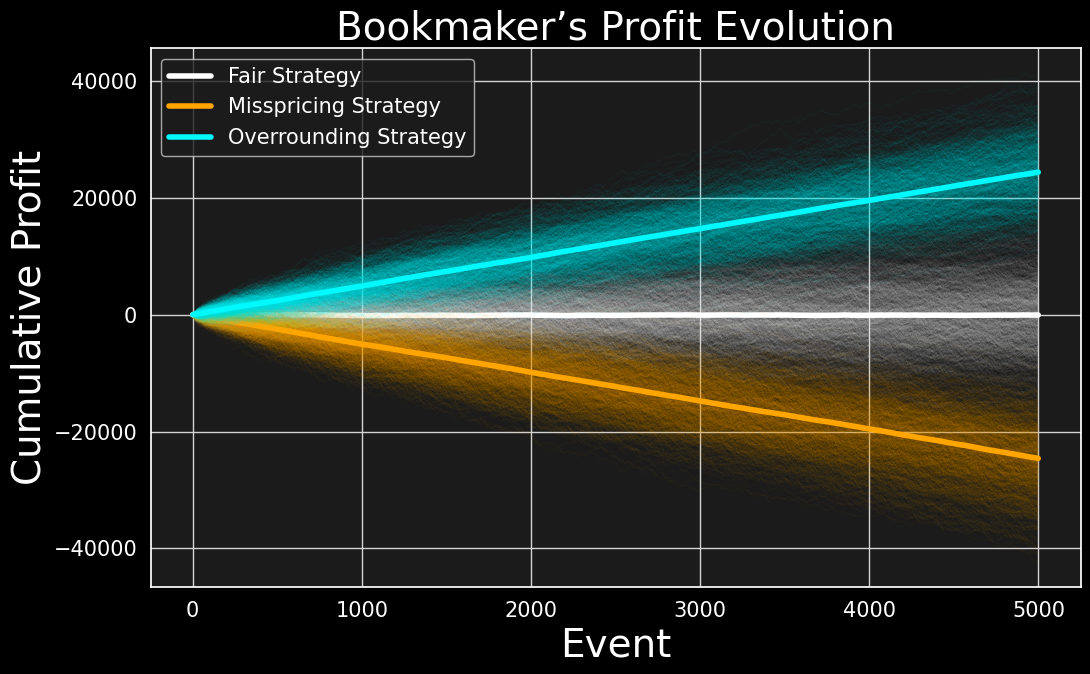

In [18]:
# Plot settings
sns.set_theme(style="darkgrid", rc={"axes.labelcolor": "white",
                                    "text.color": "white",
                                    "xtick.color": "white",
                                    "ytick.color": "white",
                                    "axes.facecolor": "#1B1B1B",
                                    "figure.facecolor": "black",
                                    "grid.color": "lightgrey",
                                    "xtick.labelsize": 15,
                                    "ytick.labelsize": 15,
                                    "legend.fontsize": 15 })
plt.figure(figsize=(12, 7))

# Plot individual simulations from DataFrames and their averages
for col in df_fair.columns:
    plt.plot(df_fair.index, df_fair[col], color='white', alpha=0.03, linewidth=0.5)
plt.plot(df_fair.index, df_fair.mean(axis=1), color='white', label='Fair Strategy', linewidth=4)

for col in df_misspricing.columns:
    plt.plot(df_misspricing.index, df_misspricing[col], color='orange', alpha=0.03, linewidth=0.5)
plt.plot(df_misspricing.index, df_misspricing.mean(axis=1), color='orange', label='Misspricing Strategy', linewidth=4)

for col in df_overrounding.columns:
    plt.plot(df_overrounding.index, df_overrounding[col], color='#00F9FD', alpha=0.03, linewidth=0.5)
plt.plot(df_overrounding.index, df_overrounding.mean(axis=1), color='#00F9FD', label='Overrounding Strategy', linewidth=4)

plt.title("Bookmaker’s Profit Evolution", fontsize=28)
plt.xlabel("Event", fontsize=28)
plt.ylabel("Cumulative Profit", fontsize=28)
plt.legend(loc='upper left', ncol=1)
plt.show()

In [ ]:
df_wimbledon = pd.read_csv('wimbledon.csv')df_wimbledon.head()